# Matrix Algebra

In this lesson I'll continue on with the topic of linear algebra. So far I've covered the basics of matrices and vectors, including how they arise from systems of linear equations, and how they can be understood geometrically via vector spaces and linear maps. In this lesson I'll focus mainly on understanding matrices directly. Specifically, we'll look at common matrix operations and important matrix factorizations. I'll also briefly talk about tensors. Let's get started.

In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from utils.math_ml import *

plt.rcParams["figure.figsize"] = (4, 3)

## Properties of Matrices

### Matrix Spaces

Just like vectors, matrices can be thought of as objects in their own **matrix space**. A matrix space is just a vector space, except it has two dimensions $m$ and $n$. We'll denote the matrix space of $m \times n$ matrices with the symbol $\mathbb{R}^{m \times n}$. Just like vector spaces, matrix spaces must be closed under linear combinations.
If $\mathbf{A}, \mathbf{B} \in \mathbb{R}^{m \times n}$ are two matrices, then any matrix linear combination $\mathbf{C} = a\mathbf{A} + b\mathbf{B}$ must also be a valid $m \times n$ matrix in $\mathbb{R}^{m \times n}$. This means matrices behave the same way under addition and scalar multiplication as vectors do.

While this fact should be kind of obvious by now, here's an example anyway. I'll choose $\mathbf{A}$ and $\mathbf{B}$ to both be $2 \times 2$ here. Adding them together or scalar multiplying them should also obviously give a matrix that's $2 \times 2$, since everything is element-wise. 

In [2]:
a = 5
A = np.array(
    [[1, 1], 
     [1, 1]])
B = np.array(
    [[1, -1], 
     [-1, 1]])
print(f'{a}A = \n{5 * A}')
print(f'A + B = \n{A + B}')

5A = 
[[5 5]
 [5 5]]
A + B = 
[[2 0]
 [0 2]]


Since every matrix corresponds to a linear map $\mathbf{F}(\mathbf{x}) = \mathbf{A}\mathbf{x}$, the space of matrices also corresponds to the space of linear maps from vectors $\mathbf{x} \in \mathbb{R}^n$ to vectors $\mathbf{y} \in \mathbb{R}^m$. Recall that the composition of linear maps is equivalent to matrix multiplication. If $\mathbf{F}(\mathbf{y}) = \mathbf{A}\mathbf{y}$ and $\mathbf{G}(\mathbf{x}) = \mathbf{B}\mathbf{x}$ are two linear maps, then their composition is equivalent to the matrix product of the two maps,

$$\mathbf{z}=\mathbf{F}(\mathbf{G}(\mathbf{x})) = \mathbf{A}\mathbf{B}\mathbf{x}.$$

The composition, and hence the matrix multiplication operation, only makes sense when the two matrices are **compatible**, i.e. $\mathbf{A} \in \mathbb{R}^{m \times n}$ and $\mathbf{B} \in \mathbb{R}^{n \times p}$. It also follows from this relationship to linear maps (which are of course just functions) that matrix multiplication is associative, i.e. we can put parenthesis wherever we like,

$$\mathbf{A}\mathbf{B}\mathbf{C} = (\mathbf{A}\mathbf{B})\mathbf{C} = \mathbf{A}(\mathbf{B}\mathbf{C}).$$

Do remember, however, that matrix multiplication (and function composition) doesn't commute, i.e. $\mathbf{A}\mathbf{B} \neq \mathbf{B}\mathbf{A}$, even when the two matrices *are* compatible.

### Transposes

Recall that every matrix $\mathbf{A} \in \mathbb{R}^{m \times n}$ has a **transpose** matrix $\mathbf{A}^\top \in \mathbb{R}^{n \times m}$ that's defined as the same matrix, but with the indices swapped,

$$(A^\top)_{i,j} = A_{j,i}.$$

Here's a quick example for a $2 \times 3$ matrix $\mathbf{A}$.

In [3]:
A = np.array(
    [[1, 2, 3], 
     [4, 5, 6]])
print(f'A^T = \n{A.T}')

A^T = 
[[1 4]
 [2 5]
 [3 6]]


What happens if we multiply two transposed matrices? Suppose $\mathbf{A}$ is $m \times n$ and $\mathbf{B}$ is $n \times p$. Then $\mathbf{A}\mathbf{B}$ is $m \times p$. That means its transpose $(\mathbf{A}\mathbf{B})^\top$ should be $p \times m$. But $\mathbf{A}^\top$ is $n \times m$ and $\mathbf{B}^\top$ is $p \times n$. This implies that the transpose of the product can only make sense if it's the product of the transposes, but in opposite order so the shapes match up right,

$$(\mathbf{A}\mathbf{B})^\top = \mathbf{B}^\top \mathbf{A}^\top.$$

This is not really a proof of this fact. If you want a proof, what you'll want to do is look at the individual elements of each side, and show the equation must be true element-by-element. I won't bore you with this. I'll just give you an example with numpy so you can see they have to be equal. I'll take $\mathbf{A}$ to be $3 \times 2$ and $\mathbf{B}$ to be $2 \times 3$, which means $(\mathbf{A}\mathbf{B})^\top$ should be $2 \times 2$. Recall you can transpose a matrix in numpy using `A.T` or `np.transpose(A)`.

In [4]:
A = np.array(
    [[1, 2, 3], 
     [4, 5, 6]])
B = np.array(
    [[-1, -2], 
     [-3, -4], 
     [-5, -6]])
print(f'(AB)^T = \n{(A @ B).T}')
print(f'B^T A^T = \n{B.T @ A.T}')

(AB)^T = 
[[-22 -49]
 [-28 -64]]
B^T A^T = 
[[-22 -49]
 [-28 -64]]


### Inverses

When a matrix is square, i.e. $\mathbf{A}$ is $n \times n$, we can think of it as mapping vectors to other vectors in the same vector space $\mathbb{R}^n$. The identity map (the "do nothing" map) always maps a vector to itself. It corresponds to the $n \times n$ **identity matrix**

$$
\mathbf{I} = 
\begin{pmatrix}
1 & 0 & 0 & \cdots & 0 \\
0 & 1 & 0 & \cdots & 0 \\
0 & 0 & 1 & \cdots & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & 0 & \cdots & 1 \\
\end{pmatrix}.
$$

Here's an example. I'll use `np.eye(n)` to generate the identity matrix for $n=5$.

In [5]:
I = np.eye(5)
print(f'I = \n{I}')

I = 
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


Recall the inverse of a square matrix $\mathbf{A}$ is the matrix $\mathbf{A}^{-1}$ satisfying

$$\mathbf{A}^{-1}\mathbf{A} = \mathbf{A}\mathbf{A}^{-1} = \mathbf{I}.$$

The inverse matrix $\mathbf{A}^{-1}$ will exist exactly when the **determinant** of $\mathbf{A}$ is nonzero, i.e. $\text{det}(\mathbf{A}) \neq 0$. If the determinant *is* zero, then the matrix is **singular**, and no inverse can be found no matter how hard you look for one.

Recall that in numpy you can invert a square matrix using `np.linalg.inv(A)`. It's usually not a good idea to do so because inverting a matrix is numerically unstable, but you can in principle. The inverse calculation runs in $O(n^3)$ time just like multiplication.

Here's an example where $\mathbf{A}$ is $2 \times 2$. You can already see from this example the numerical loss of precision creeping in, since neither $\mathbf{A}^{-1}\mathbf{A}$ nor  $\mathbf{A}\mathbf{A}^{-1}$ exactly yield the identity matrix.

In [6]:
A = np.array(
    [[1, 2], 
     [3, 4]])
A_inv = np.linalg.inv(A)
print(f'A^(-1) = \n{A_inv}')
print(f'A^(-1) A = \n{A_inv @ A}')
print(f'A A^(-1) = \n{A @ A_inv}')

A^(-1) = 
[[-2.   1. ]
 [ 1.5 -0.5]]
A^(-1) A = 
[[1.00000000e+00 0.00000000e+00]
 [1.11022302e-16 1.00000000e+00]]
A A^(-1) = 
[[1.0000000e+00 0.0000000e+00]
 [8.8817842e-16 1.0000000e+00]]


Just like with the transpose, we can ask what happens if we try to invert the product of two matrices. You can convince yourself that the same kind of rule holds: the inverse of a product is the product of the inverses in *reverse order*,

$$(\mathbf{A}\mathbf{B})^{-1} = \mathbf{B}^{-1} \mathbf{A}^{-1}.$$

Here's a $2 \times 2$ "proof" of this fact.

In [7]:
A = np.array(
    [[1, 2], 
     [3, 4]])
B = np.array(
    [[1, 0], 
     [1, 1]])
A_inv = np.linalg.inv(A)
B_inv = np.linalg.inv(B)
AB_inv = np.linalg.inv(A @ B)
print(f'(AB)^(-1) = \n{AB_inv}')
print(f'B^(-1) A^(-1) = \n{B_inv @ A_inv}')

(AB)^(-1) = 
[[-2.   1. ]
 [ 3.5 -1.5]]
B^(-1) A^(-1) = 
[[-2.   1. ]
 [ 3.5 -1.5]]


I encourage you to check this result using the fact I derived from the last lesson for $2 \times 2$ matrices,

$$
\mathbf{A} = 
\begin{pmatrix}
a & b \\
c & d \\
\end{pmatrix} \quad \Longrightarrow \quad
\mathbf{A}^{-1} = \frac{1}{ad-bc}
\begin{pmatrix}
d & -b \\
-c & a \\
\end{pmatrix}.
$$

### Determinant and Trace

Notice something from this formula. Since $\text{det}(\mathbf{A}) = ad - bc$ in this case, we can evidently write

$$\mathbf{A}^{-1} = \frac{1}{\text{det}(\mathbf{A})} \mathbf{\tilde A},$$

where $\mathbf{\tilde A}$ is some kind of matrix related to $\mathbf{A}$. The properties of $\mathbf{\tilde A}$ aren't important (it's called the *adjugate* if you're curious). But this general fact turns out to be true for any $n \times n$ matrix, except the formula for the determinant gets a lot more complicated. What's important is that $\mathbf{A}^{-1}$ is *inversely proportional* to the determinant. That's why we can't allow $\text{det}(\mathbf{A}) = 0$, because then $\mathbf{A}^{-1}$ blows up due to the division by zero.

Now, I've already said $(\mathbf{A}\mathbf{B})^{-1} = \mathbf{B}^{-1} \mathbf{A}^{-1}$. If then 

$$\mathbf{A}^{-1} = \frac{1}{\text{det}(\mathbf{A})}\mathbf{\tilde A}, \quad \mathbf{B}^{-1} = \frac{1}{\text{det}(\mathbf{B})}\mathbf{\tilde B},$$

it's evidently the case that

$$(\mathbf{AB})^{-1} = \frac{1}{\text{det}(\mathbf{AB})}\mathbf{\tilde{AB}} = \frac{1}{\text{det}(\mathbf{A}) \cdot \text{det}(\mathbf{B})}\mathbf{\tilde B}\mathbf{\tilde A} = \mathbf{B}^{-1} \mathbf{A}^{-1}.$$ 

Provided that $\mathbf{\tilde{AB}}=\mathbf{\tilde B}\mathbf{\tilde A}$, which is true, it thus follows that

$$\text{det}(\mathbf{A}\mathbf{B}) = \text{det}(\mathbf{A}) \cdot \text{det}(\mathbf{B}) = \text{det}(\mathbf{B}) \cdot \text{det}(\mathbf{A}).$$

Said differently, the determinant of a matrix product is just the product of their individual determinants.

In general, the determinant of an $n \times n$ matrix $\mathbf{A}$ is a nasty $n$ degree multivariate polynomial of the elements of $\mathbf{A}$. There's no reliably easy way to calculate it except for small $n$ matrices. In numpy, you can use `np.linalg.det(A)` to calculate the determinant, but just as with inverses, this is a numerically unstable operation, and so should be avoided where possible. Moreover, it runs in $O(n^3)$ time, which is just as slow as matrix multiplication.

Here's an example. I'll verify this "product rule" for determinants using two $3 \times 3$ matrices. The determinant of both matrices turns out to be $6$, which means their product should have determinant $36$.

In [8]:
A = np.array(
    [[3, 0, 0],
     [1, 2, 0],
     [1, 1, 1]])
B = np.array(
    [[1, 1, 1],
     [0, 2, 1],
     [0, 0, 3]])
det_A = np.linalg.det(A)
det_B = np.linalg.det(B)
det_AB = np.linalg.det(A @ B)
print(f'det(A) = {det_A}')
print(f'det(B) = {det_B}')
print(f'det(AB) = {det_AB}')

det(A) = 6.0
det(B) = 6.0
det(AB) = 36.0


Notice in both cases the determinant happens to be the product of the diagonal elements 

$$\text{det}(\mathbf{A}) = \text{det}(\mathbf{B}) = 1 \cdot 2 \cdot 3 = 6.$$

I rigged the result to come out this way. It's not always true. It's only true when a matrix is either lower triangular (the elements *above* the diagonal are all zero), upper triangular (the elements *below* the diagonal are all zero), or diagonal (the elements *off* the diagonal are all zero). In this example, $\mathbf{A}$ was lower triangular and $\mathbf{B}$ was upper triangular. I chose both to have the same diagonal elements (in different order) on purpose. 

More generally, if $\mathbf{A}$ is diagonal or upper/lower triangular, then

$$\text{det}(\mathbf{A}) = \prod_{i=0}^{n-1} A_{i,i} = A_{0,0} A_{1,1} \cdots A_{n-1,n-1}.$$

It's not yet obvious, but we can always "change" a square matrix $\mathbf{A}$ into one of these three kinds of matrices, and then calculate the determinant of $\mathbf{A}$ this way. There are a few ways to do this. I'll cover these when I get to matrix factorizations below.

Some other properties of the determinant that you can verify are,

- $\text{det}(\mathbf{I}) = 1$.
- $\text{det}(\mathbf{A}^\top) = \text{det}(\mathbf{A})$.
- $\text{det}(\mathbf{A}^{-1}) = \frac{1}{\text{det}(\mathbf{A})}$.
- $\text{det}(c\mathbf{A}) = c^n\text{det}(\mathbf{A})$.

The determinant is one important way to get a scalar out of a matrix. Another useful scalar is the **trace**, which is far simpler to calculate. The trace of a matrix $\mathbf{A}$ is the sum of its diagonal elements, usually written

$$\text{tr}(\mathbf{A}) = \sum_{i=0}^{n-1} A_{i,i} = A_{0,0} + A_{1,1} + \cdots + A_{n-1,n-1}.$$

Unlike the determinant, the trace doesn't split up over products. It instead splits over addition,

$$\text{tr}(\mathbf{A} + \mathbf{B}) = \text{tr}(\mathbf{A}) + \text{tr}(\mathbf{B}).$$

This is very easy to verify from the fact that the sum is element-wise, so $\sum (A+B)_{i,i} = \sum A_{i,i} + \sum B_{i,i}$.

Some other fairly trivial properties the trace satisfies are,

- $\text{tr}(\mathbf{I}) = n$.
- $\text{tr}(\mathbf{A}^\top) = \text{tr}(\mathbf{A})$.
- $\text{tr}(c\mathbf{A}) = c\text{tr}(\mathbf{A})$.
- $\text{tr}(\mathbf{A}\mathbf{B}) = \text{tr}(\mathbf{B}\mathbf{A})$.

Here's a "proof" of the last result on the same $3 \times 3$ matrices above. In numpy, you can calculate the trace using `np.trace`. It's not unstable like the determinant is, and it's fast to calculate since it's only summing the $n$ diagonal terms, which is $O(n)$ time.

In [9]:
tr_AB = np.trace(A @ B)
tr_BA = np.trace(B @ A)
print(f'tr(AB) = {tr_AB}')
print(f'tr(BA) = {tr_BA}')

tr(AB) = 13
tr(BA) = 13


It's kind of obvious what the determinant is good for. It tells you how invertible a matrix is. But what does the trace tell you? It turns out both the trace and the determinant also tell you something important about the *scale* of the matrix. We'll see this in more depth below when we talk about eigenvalues.

### Linear Independence and Rank

We can always think of a matrix in terms of its **column vectors**. If $\mathbf{A}$ is $m \times n$, it has $n$ column vectors $\mathbf{a}_0, \mathbf{a}_1, \cdots, \mathbf{a}_{n-1}$ each of size $m$. Concatenated together in order, the column vectors form the matrix itself,

$$
\mathbf{A} = 
\begin{pmatrix}
\mathbf{a}_0 & \mathbf{a}_1 & \cdots & \mathbf{a}_{n-1}
\end{pmatrix}.
$$

It turns out these column vectors also tell us how invertible a matrix is, but in a more general and useful way than the determinant does. Roughly speaking, a matrix is invertible if we can't write any one column vector as a function of the other column vectors. This is just the definition of linear independence.

Recall a set of vectors $\mathbf{x}_0, \mathbf{x}_1, \cdots, \mathbf{x}_{k-1}$ is *linearly independent* if no one vector is a linear combination of the rest,

$$\mathbf{x}_j \neq \sum_{i \neq j} c_i \mathbf{x}_j.$$

If one vector *is* a linear combination of the rest, they're *linearly dependent*.

An $n \times n$ matrix $\mathbf{A}$ is invertible if and only if its column vectors are all linearly independent. Equivalently, the column vectors span an $n$-dimensional vector space. To see why this is true, let's look at a $2 \times 2$ matrix $\mathbf{A}$ with column vectors $\mathbf{a}=\binom{a}{b}$ and $\mathbf{b}=\binom{c}{d}$,

$$
\mathbf{A} = \begin{pmatrix} \mathbf{a} & \mathbf{b} \end{pmatrix} = 
\begin{pmatrix}
a & b \\
c & d \\
\end{pmatrix}.
$$

Now, if $\mathbf{a}$ and $\mathbf{b}$ are linearly *dependent*, then $\mathbf{b}$ must be a scalar multiple of $\mathbf{a}$, say $\mathbf{b} = \beta \mathbf{a}$. Then $\mathbf{A}$ would look like

$$
\mathbf{A} = \begin{pmatrix} \mathbf{a} & \beta \mathbf{a} \end{pmatrix} = 
\begin{pmatrix}
a & \beta a \\
c & \beta c \\
\end{pmatrix}.
$$

This means its determinant would be $\text{det}(\mathbf{A}) = \beta ac - \beta ac = 0$, which of course means $\mathbf{A}$ can't be invertible. 

Graphically, saying the column vectors are linearly dependent is saying they'll map any vector onto the same subspace. For the $2 \times 2$ case, that means any vector $\mathbf{v}$ hit by $\mathbf{A}$ will get mapped onto the same line, no matter what $\mathbf{v}$ you pick. The matrix is collapsing, or *projecting*, the vector space down to a lower-dimensional subspace.

Here's a plot of this idea. I'll make $\mathbf{A}$ have two linearly dependent columns, then plot its action on several different vectors, plotted in black. Acting on these by $\mathbf{A}$ will map them to the red vectors, which all lie on the same line in the plane. They're all collapsing onto the same subspace, evidently the line $y=-x$.

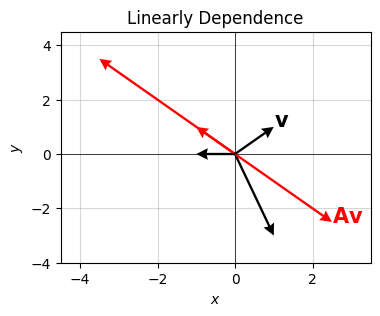

In [10]:
#| fig-align: center
beta = 1.5
a0 = np.array([1, -1]).reshape(-1, 1)
a1 = beta * a0
A = np.hstack([a0, a1])
v = np.array([1, 1]).reshape(-1, 1)
w = np.array([-1, 0]).reshape(-1, 1)
u = np.array([1, -3]).reshape(-1, 1)
vectors = [x.flatten() for x in [v, A @ v, w, A @ w, u, A @ u]]

plot_vectors(vectors, colors=['black', 'red'] * 3, title='Linearly Dependence',
             labels=['$\mathbf{v}$', '$\mathbf{A}\mathbf{v}$'] + [''] * 4,
             text_offsets=[[0, 0]] * 6, headwidth=5)

The number of linearly independent column vectors a matrix has is called its **rank**, written $\text{rank}(\mathbf{A})$. Clearly it'll always be the case that $\text{rank}(\mathbf{A}) \leq n$. When $\text{rank}(\mathbf{A}) = n$ exactly the matrix is called **full rank**. Only full rank square matrices are invertible.

Here's an example. I'll use `np.linalg.matrix_rank(A)` to calculate the rank of the above $2 \times 2$ example. Since $\text{rank}(\mathbf{A})=1<2$, the matrix $\mathbf{A}$ must be singular, as I've of course already shown.

In [11]:
rank = np.linalg.matrix_rank(A)
print(f'rank(A) = {rank}')

rank(A) = 1


### Outer Products

We'll frequently be interested in **low rank** matrices, which are matrices whose rank is much much less than the dimension, i.e. $\text{rank}(\mathbf{A}) << n$. As we'll see, low rank matrices are special because they can efficiently compress the information contained in a matrix, which often allows us to represent data more efficiently, or clean up data by denoising away "unnecessary" dimensions. In fact, approximating a matrix with a lower rank matrix is the whole idea behind dimension reduction, one of the core areas of unsupervised learning.

The most useful low-rank matrices are the outer products of two vectors. If $\mathbf{x}$ and $\mathbf{y}$ are size $n$ vectors, define their **outer product** by

$$
\mathbf{x} \mathbf{y}^\top = 
\begin{pmatrix}
x_0 y_0 & x_0 y_1 & \cdots & x_0 y_{n-1} \\
x_1 y_0 & x_1 y_1 & \cdots & x_1 y_{n-1} \\
\vdots & \vdots & \ddots & \vdots \\
x_{n-1} y_0 & x_{n-1} y_1 & \cdots & x_{n-1} y_{n-1} \\
\end{pmatrix}.
$$

Each column vector $\mathbf{a}_j$ of the outer product matrix is linearly proportional to the first column $\mathbf{a}_0$, since

$$\mathbf{a}_j = \mathbf{x} y_j = \mathbf{x} y_0 \frac{y_j}{y_0} = \frac{y_j}{y_0} \mathbf{a}_0.$$

This means that only one column vector is linearly independent, which implies $\text{rank}(\mathbf{x} \mathbf{y}^\top)=1$. The outer product is evidently rank-1, and hence highly singular. You'd never be able to invert it. But it is useful as we'll see soon.

Here's an example of an outer product calculation. You can either calculate `x @ y.T` directly or use `np.outer(x, y)`. Since both vectors are size $3$, the outer product should be a $3 \times 3$ matrix with rank-1.

In [12]:
x = np.array([1, 2, 3])
y = np.array([3, 2, 1])
outer = np.outer(x, y)
print(f'xy^T = \n{outer}')
print(f'rank(xy^T) = {np.linalg.matrix_rank(outer)}')

xy^T = 
[[3 2 1]
 [6 4 2]
 [9 6 3]]
rank(xy^T) = 1


You can think of the outer product matrix as a kind of projection matrix. It always projects vectors onto the same one-dimensional line in $\mathbb{R}^n$. Why? Suppose $\mathbf{v}$ is some vector. If we hit it with the outer product matrix $\mathbf{x} \mathbf{y}^\top$, using the fact matrix multiplication is associative, we get

$$(\mathbf{x} \mathbf{y}^\top) \mathbf{v} = \mathbf{x} (\mathbf{y}^\top \mathbf{v}) = (\mathbf{y} \cdot \mathbf{v}) \mathbf{x}.$$

That is, $\mathbf{v}$ just gets projected onto the space spanned by the vector $\mathbf{x}$. Evidently the other outer product vector $\mathbf{y}$ determines how long the projection vector will be. Here's a visual representation of this idea for 2-dimensional vectors. Take

\begin{align*}
\mathbf{x} &= (1, 1) \\
\mathbf{y} &= (1, -1) \\
\mathbf{v}_0 &= (-1, 2) \quad &\Longrightarrow \quad (\mathbf{y} \cdot \mathbf{v}_0) \mathbf{x} &= (-3, -3) \\
\mathbf{v}_1 &= (2, 0) \quad &\Longrightarrow \quad (\mathbf{y} \cdot \mathbf{v}_1) \mathbf{x} &= (2, 2) \\
\mathbf{v}_2 &= (2, -1) \quad &\Longrightarrow \quad (\mathbf{y} \cdot \mathbf{v}_2) \mathbf{x} &= (3, 3). \\
\end{align*}

Applying the outer product $\mathbf{x} \mathbf{y}^\top$ to each $\mathbf{v}_i$ should project each vector onto the space spanned by $\mathbf{x}=(1, 1)$, which is just the line $y=x$. Notice the projections are all proportional to $(1, 1)$, as they should be. In the plot below, each vector and its projection have the same color. The outer product vectors $\mathbf{x}$ and $\mathbf{y}$ are shown in black.

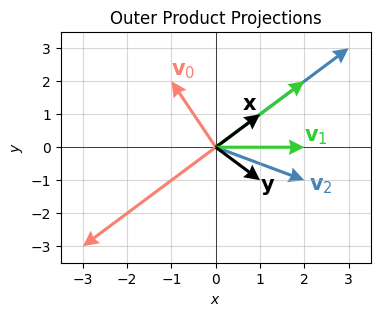

In [13]:
#| fig-align: center
x = np.array([1, 1]).reshape(-1, 1)
y = np.array([1, -1]).reshape(-1, 1)
vs = [np.array([-1, 2]).reshape(-1, 1), 
      np.array([2, 0]).reshape(-1, 1), 
      np.array([2, -1]).reshape(-1, 1)]
ws = [(x @ y.T) @ v for v in vs]
vectors = [vector.flatten() for vector in vs + ws + [x, y]]
plot_vectors(
    vectors, colors=['salmon', 'limegreen', 'steelblue'] * 2 + ['black', 'black'], headwidth=5, width=0.01,
    labels=['$\mathbf{v}_0$', '$\mathbf{v}_1$', '$\mathbf{v}_2$'] + [''] * 3 + ['$\mathbf{x}$', '$\mathbf{y}$'],
    text_offsets = [[0, 0.2], [0, 0.2], [0.1, -0.3]] + [[0,0]] * 3 + [[-0.4, 0.15], [0, -0.3]], ticks_every=1,
    title='Outer Product Projections', zorders=[0, 5, 1, 2, 4, 3, 4, 6, 7], xlim=(-3.5, 3.5), ylim=(-3.5, 3.5))

## Special Matrices

There are many classes of matrices that have various special properties. I'll quickly introduce a few that'll be of interest to us in machine learning.

### Diagonal Matrices

Probably the most basic class of matrices are the diagonal matrices. A **diagonal matrix** is an $m \times n$ matrix $\mathbf{D}$ whose elements are only non-zero on the diagonals, i.e. $D_{i,j} = 0$ if $i \neq j$. For example, the following $3 \times 3$ matrix is diagonal since its only non-zero values lie on the diagonal,

$$
\mathbf{D} = 
\begin{pmatrix}
1 & 0 & 0 \\
0 & 2 & 0 \\
0 & 0 & 3 \\
\end{pmatrix}.
$$

We've already seen an important diagonal matrix a few times, the identity matrix $\mathbf{I}$. The identity matrix is the diagonal matrix whose diagonal entries are all ones. It's common to short-hand a diagonal matrix by just specifying its diagonal entries as a vector. In this notation, we'd use the short-hand

$$\mathbf{D} = \text{diag}(1,2,3).$$ 

to refer to the matrix in the above example. It means exactly the same thing, we're just only specifying the diagonal elements. This is also the easiest way to define a diagonal matrix in numpy, by using `np.diag`. Notice that a diagonal matrix contains $n^2$ elements, but we only need to specify $n$ of them to fully determine what the matrix is (i.e. the diagonal elements themselves).

In a sense, a diagonal matrix can only scale a vector it acts on, not rotate it or reflect it. This is because multiplying diagonal matrix with a vector is equivalent to element-wise multiplying the diagonal elements with the vector, which causes each vector component to get stretched by some amount. For example, if $\mathbf{x}=(1,1,1)$, when the above example $\mathbf{D}$ acts on it, we'd get

$$
\mathbf{D}\mathbf{x} = 
\begin{pmatrix}
1 & 0 & 0 \\
0 & 2 & 0 \\
0 & 0 & 3 \\
\end{pmatrix}
\begin{pmatrix}
1 \\
1 \\
1 \\
\end{pmatrix} = 
\begin{pmatrix}
1 \\
2 \\
3 \\
\end{pmatrix} = 
\begin{pmatrix}
1 \\
2 \\
3 \\
\end{pmatrix} \circ 
\begin{pmatrix}
1 \\
1 \\
1 \\
\end{pmatrix}.
$$

Here's an example of how to define a diagonal matrix in numpy using `np.diag`. I'll define the same matrix as the above example, and then act on the same vector to show it just scales the entries.

In [14]:
D = np.diag([1, 2, 3])
x = np.array([1, 1, 1]).reshape(-1, 1)
print(f'D = diag(1,2,3) = \n{D}')
print(f'Dx = {(D @ x).flatten()}')

D = diag(1,2,3) = 
[[1 0 0]
 [0 2 0]
 [0 0 3]]
Dx = [1 2 3]


### Symmetric Matrices

Another special class of matrices important to machine learning is the symmetric matrix. A **symmetric matrix** is a square matrix $\mathbf{S}$ that equals its own transpose, i.e. $\mathbf{S}^\top = \mathbf{S}$. They're called symmetric matrices because their lower diagonals and upper diagonals are mirror images. Symmetric matrices can be thought of as the matrix equivalent of a real number.

For example, consider the matrix
$$
\mathbf{S} = 
\begin{pmatrix}
1 & -1 & -2 \\
-1 & 2 & 1 \\
-2 & 1 & 3 \\
\end{pmatrix}.
$$

This matrix is symmetric since the upper diagonal and lower diagonal are the same, i.e. $S_{i,j} = S_{j,i}$. Symmetric matrices are very important as we'll see. They're the matrix generalization of the idea of a real number. 

Since the lower diagonal and upper diagonal of a symmetric matrix always equal, we only need to specify what the diagonal and upper diagonal are to fully determine the matrix. If $\mathbf{S}$ contains $n^2$ entries, only 
$$n + \frac{1}{2}(n^2 - n) = \frac{1}{2}n(n+1)$$

of those elements are actually unique. This fact can be used to shave a lot of time off of algorithms involving symmetric matrices. In numpy, you can check a matrix $\mathbf{S}$ is symmetric by checking that it equals its transpose. Due to numerical roundoff, you may want to wrap the condition inside `np.allclose`.

In [15]:
S = np.array([
    [1, -1, -2],
    [-1, 2, 1],
    [-2, 1, 3]])
is_symmetric = lambda A: np.allclose(A, A.T)
is_symmetric(S)

True

### Upper and Lower Triangular Matrices

Closely related to diagonal matrices are lower and upper triangular matrices. An $m \times n$ matrix $\mathbf{L}$ is **lower-triangular** if the entries in its *upper* diagonal are zero, i.e. $L_{i,j} = 0$ when $i < j$. Similarly, an $m \times n$ matrix $\mathbf{U}$ is **upper-triangular** if the entries in its *lower* diagonal are zero, i.e. $U_{i,j} = 0$ when $i > j$. I've already showed an example of these when I covered determinants. Here they are again,

$$
\mathbf{L} = 
\begin{pmatrix}
3 & 0 & 0 \\
1 & 2 & 0 \\
1 & 1 & 1 \\
\end{pmatrix}, \qquad \mathbf{U} = 
\begin{pmatrix}
1 & 1 & 1 \\
0 & 2 & 1 \\
0 & 0 & 3 \\
\end{pmatrix}.
$$

Upper and lower triangular (and diagonal) matrices are useful because it's easy to invert them and calculate their determinants. Just like symmetric matrices, only $\frac{1}{2}n(n+1)$ unique elements are needed to fully specify these matrices since an entire off-diagonal is all zeros.

### Orthogonal Matrices

The next class of matrices I'll introduce are more subtle, but very important geometrically. These are the orthogonal matrices. An **orthogonal matrix** is an $n \times n$ matrix $\mathbf{Q}$ whose transpose is its inverse, i.e.

$$\mathbf{Q}^\top = \mathbf{Q}^{-1} \quad \text{or} \quad \mathbf{Q}^\top \mathbf{Q}=\mathbf{I}.$$

As an example, consider the following matrix,

$$
\mathbf{Q} = \frac{1}{\sqrt{2}}
\begin{pmatrix}
1 & 1 \\
1 & -1 \\
\end{pmatrix} = 
\begin{pmatrix}
\frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} \\
\frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}} \\
\end{pmatrix}.
$$

We can check $\mathbf{Q}$ is orthogonal by checking it satisfies the condition $\mathbf{Q}^\top \mathbf{Q}=\mathbf{I}$,

$$
\mathbf{Q}^\top \mathbf{Q} = 
\frac{1}{\sqrt{2}}
\begin{pmatrix}
1 & 1 \\
1 & -1 \\
\end{pmatrix}
\frac{1}{\sqrt{2}}
\begin{pmatrix}
1 & 1 \\
1 & -1 \\
\end{pmatrix} = 
\frac{1}{2}
\begin{pmatrix}
2 & 0 \\
0 & 2 \\
\end{pmatrix} = 
\begin{pmatrix}
1 & 0 \\
0 & 1 \\
\end{pmatrix} = \mathbf{I}.
$$

Notice from this example that the column vectors $\mathbf{q}_0, \mathbf{q}_1$ form an orthonormal basis for $\mathbb{R}^2$, since 

$$\mathbf{q}_0 \cdot \mathbf{q}_1 = 0, \quad \mathbf{q}_0 \cdot \mathbf{q}_0 = \mathbf{q}_1 \cdot \mathbf{q}_1 = 1.$$ 

This is a general fact. The column vectors of an orthogonal matrix $\mathbf{Q}$ form a complete set of orthonormal basis vectors for $\mathbb{R}^n$. Conversely, we can always form an orthogonal matrix by first finding an orthonormal basis and then creating column vectors out of the basis vectors. This is usually the way orthogonal matrices are constructed in practice using algorithms like the [Gram-Schmidt Algorithm](https://en.wikipedia.org/wiki/Gram%E2%80%93Schmidt_process).

It's not at all obvious, but the fact that the column vectors of $\mathbf{Q}$ form an orthonormal basis constrains the number of unique elements $\mathbf{Q}$ is allowed to have. Requiring each $\mathbf{q}_i$ means $n$ total elements are already determined. The further requirement that the column vectors be mutually orthogonal determines another $\frac{1}{2}n(n-1)$. This means $\mathbf{Q}$ only has $n^2 - n - \frac{1}{2}n(n-1) = \frac{1}{2}n(n-1)$ unique elements. For example, when $\mathbf{Q}$ is $2 \times 2$ it only has $\frac{1}{2}2(2-1)=1$ unique element. The other $3$ are all determined by that one element. This unique element can be thought of as a rotation angle. I'll come back to this in a minute.

An important fact about orthogonal matrices is that they preserve the dot products between vectors. If $\mathbf{x}$ and $\mathbf{y}$ are two vectors, then

$$(\mathbf{Q} \mathbf{x}) \cdot (\mathbf{Q}\mathbf{y}) = \mathbf{x} \cdot \mathbf{y}.$$

This follows from the fact that $(\mathbf{Q} \mathbf{x})^\top (\mathbf{Q} \mathbf{y}) = \mathbf{x}^\top \mathbf{Q}^\top\mathbf{Q}\mathbf{y} = \mathbf{x}^\top \mathbf{I} \mathbf{y} = \mathbf{x}^\top \mathbf{y}$. Since the dot product encodes the notions of length and angle, this fact implies that orthogonal matrices can't change the lengths of vectors, nor the angles between vectors. Orthogonal matrices preserve the *geometry* of the vector space.

This fact suggests some deep intuition about what orthogonal matrices do. If they can't change the lengths of vectors or the angles between them, then all they can do is *rotate* vectors or *reflect* them across some line. In fact, it turns out any $2 \times 2$ orthogonal matrix can be written in the form

$$
\mathbf{Q} = 
\begin{pmatrix}
\cos \theta & \mp \sin \theta \\
\sin \theta & \pm \cos \theta \\
\end{pmatrix},
$$

where $\theta$ is some angle (expressed in radians). When the right column vector is $\binom{-\sin\theta}{\cos\theta}$, $\mathbf{Q}$ is a pure **rotation matrix**. It will rotate any vector in the plane by an angle $\theta$, counterclockwise if $\theta > 0$, and clockwise if $\theta < 0$. When the right column vector is $\binom{\sin\theta}{-\cos\theta}$, $\mathbf{Q}$ becomes a **reflection matrix**; it'll reflect vectors about the line at an angle $\frac{\theta}{2}$ with the x-axis. The combination of these two together can generate any 2D rotation or reflection.

Here's a visual of this idea. I'll take the unit vector $\mathbf{e}_x=(1,0)$ and use $\mathbf{Q}$ to rotate it by some angle, in this case $\theta = 45^\circ$. Note the need to convert the angle to radians by multiplying the angle in degrees by $\frac{\pi}{180}$. You should be able to confirm that the red vector is indeed the black vector $\mathbf{e}_x$ rotated counterclockwise by $45^\circ$ to the new vector $\mathbf{Q}\mathbf{e}_x = 2^{-1/2}(1,1)$. The factor of $2^{-1/2}$ appears to keep the vector normalized to unit length.

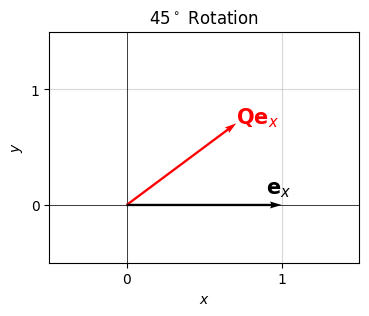

In [16]:
#| fig-align: center
theta_degrees = 45
theta = theta_degrees * np.pi / 180
Q = np.array([
    [np.cos(theta), -np.sin(theta)], 
    [np.sin(theta), np.cos(theta)]])
ex = np.array([1, 0]).reshape(-1, 1)
Qex = Q @ ex
plot_vectors([ex.flatten(), Qex.flatten()], colors=['black', 'red'], title=f'${theta_degrees}^\circ$ Rotation',
             labels=['$\mathbf{e}_x$', '$\mathbf{Q}\mathbf{e}_x$'], text_offsets=[[-0.1, 0.1], [0, 0]],
             ticks_every=1, xlim=(-0.5, 1.5), ylim=(-0.5, 1.5))

I'll finish this section by noting that orthogonal matrices always have determinant $\pm 1$. You can see this by applying the determinant product formula to $\mathbf{Q}^\top \mathbf{Q}=\mathbf{I}$,

$$1 = \text{det}(\mathbf{I}) = \text{det}(\mathbf{Q}^\top \mathbf{Q}) = \text{det}(\mathbf{Q}^\top) \cdot \text{det}(\mathbf{Q}) = \big(\text{det}(\mathbf{Q})\big)^2,$$

which implies $\text{det}(\mathbf{Q}) = \pm 1$. This evidently divides orthogonal matrices into two distinct classes:

- $\text{det}(\mathbf{Q}) = +1$: These are the orthogonal matrices that correspond to pure rotations.
- $\text{det}(\mathbf{Q}) = -1$: These are the orthogonal matrices that correspond to reflections.

I'll verify that the rotation matrix I just plotted indeed has determinant $+1$.

In [17]:
print(f'det(Q) = {np.linalg.det(Q)}')

det(Q) = 1.0


### Block Matrices

Sometimes a matrix might look kind of diagonal or triangular, but not exactly. For example, consider the following matrix,

$$
\mathbf{A} = 
\begin{pmatrix}
1 & 2 & 0 & 0 \\
3 & 4 & 0 & 0 \\
0 & 0 & 5 & 6 \\
0 & 0 & 7 & 8 \\
\end{pmatrix}.
$$

This matrix looks kind of diagonal, but not exactly. Notice, however, that we can think about this matrix as being composed of four sub-matrices, or **blocks**,

$$
\mathbf{A}_{0,0} = 
\begin{pmatrix}
1 & 2 \\
3 & 4 \\
\end{pmatrix}, \quad
\mathbf{A}_{0,1} = 
\begin{pmatrix}
0 & 0 \\
0 & 0 \\
\end{pmatrix}, \quad
\mathbf{A}_{1,0} = 
\begin{pmatrix}
0 & 0 \\
0 & 0 \\
\end{pmatrix}, \quad
\mathbf{A}_{1,1} = 
\begin{pmatrix}
5 & 6 \\
7 & 8 \\
\end{pmatrix}.
$$

If we think of $\mathbf{A}$ in terms of these 4 blocks, we can write it simply as

$$
\mathbf{A} = 
\begin{pmatrix}
1 & 2 & 0 & 0 \\
3 & 4 & 0 & 0 \\
0 & 0 & 5 & 6 \\
0 & 0 & 7 & 8 \\
\end{pmatrix} = 
\begin{pmatrix}
\begin{pmatrix} 1 & 2 \\ 3 & 4 \\ \end{pmatrix} & \begin{pmatrix} 0 & 0 \\ 0 & 0 \\ \end{pmatrix} \\
\begin{pmatrix} 0 & 0 \\ 0 & 0 \\ \end{pmatrix} & \begin{pmatrix} 5 & 6 \\ 7 & 8 \\ \end{pmatrix} \\
\end{pmatrix} = 
\begin{pmatrix}
\mathbf{A}_{0,0} & \mathbf{A}_{0,1} \\
\mathbf{A}_{1,0} & \mathbf{A}_{1,1} \\
\end{pmatrix}.
$$

Where the braces are doesn't really effect anything other than how the elements are indexed. What matters is we can express this $4 \times 4$ matrix as a $2 \times 2$ **block matrix** that semantically represents the exact same matrix. Notice that in block form $\mathbf{A}$ is now a diagonal matrix. We call a matrix that can be blocked into diagonal form like this **block diagonal**. Block diagonal matrices are the most useful of the block matrices. If a block matrix is upper or lower triangular, we'd call it a **block upper triangular** or **block lower triangular** matrix, respectively.

When matrices are in block form, you can manipulate them exactly the way you would if they weren't. The only difference is that you have to remember matrix multiplication doesn't commute. For example, we could write $\mathbf{A}^2 = \mathbf{A}\mathbf{A}$ in block form as

$$
\mathbf{A}^2 = \mathbf{A}\mathbf{A} = 
\begin{pmatrix}
\mathbf{A}_{0,0} & \mathbf{A}_{0,1} \\
\mathbf{A}_{1,0} & \mathbf{A}_{1,1} \\
\end{pmatrix}
\begin{pmatrix}
\mathbf{A}_{0,0} & \mathbf{A}_{0,1} \\
\mathbf{A}_{1,0} & \mathbf{A}_{1,1} \\
\end{pmatrix} = 
\begin{pmatrix}
\mathbf{A}_{0,0}\mathbf{A}_{0,0} + \mathbf{A}_{0,1}\mathbf{A}_{1,0}  & \mathbf{A}_{0,0}\mathbf{A}_{0,1} + \mathbf{A}_{0,1}\mathbf{A}_{1,1} \\
\mathbf{A}_{1,0}\mathbf{A}_{0,0} + \mathbf{A}_{1,1}\mathbf{A}_{1,0} & \mathbf{A}_{1,0}\mathbf{A}_{0,1} + \mathbf{A}_{1,1}\mathbf{A}_{1,1} \\
\end{pmatrix}.
$$

This would give the exact same answer as multiplying $\mathbf{A}^2 = \mathbf{A}\mathbf{A}$ in regular form, except we'd have extra braces floating around that we can ignore.

Now, you might ask why we even care about blocking matrices like this. Probably the most important reason we care is *hardware*. Computer memory is typically divided into a sequence of fixed-sized blocks. When we want to operate on an array, the system has to go into memory and fetch where those array values are stored, perform the array operation, and then place the answer back into memory. During the fetch step, it will take a long time if the array elements are located far away from each other in different blocks. For this reason, programs tend to place array elements nearby each other in memory. But when one block runs out, the program has to go find a new block of memory to place the other elements. This suggests that if we want to efficiently fetch array elements from memory, we should do so block by block. That is, we should find a way to partition the array so each block of the array fits in the same block of memory. If we do this, we can perform operations much faster than we would if the program had to search new blocks every time it needed to perform an operation.

The best example of this is matrix multiplication. While it might take $O(n^3)$ time to multiply two arrays *in theory*, don't forget that asymptotic notation has a hidden constant term out front that we ignore. In real life, that constant can make a big difference. If we try to multiply two matrices without doing any blocking, we'd have a much larger constant than if we first blocked the matrices into blocks that would fit in one block of memory. In fact, this is what the LAPACK routines behind functions like `np.matmul` do. They don't just naively multiply two matrices by running over a triple loop. They first block both matrices into sub-matrix blocks that fit efficiently in memory, and then run the triple loop block-style before putting everything back together. It's for this reason more than anything else that numpy array methods run much faster than anything you'd write in python. When it comes to array operations, numpy and the LAPACK routines will swim laps around anything you'd code up yourself.

### Sparse Matrices

A very useful class of matrices in applications are the sparse matrices. **Sparse matrices** are defined by the property that most of their entries are zero. Only a sparse number of elements are non-zero. When a matrix is sparse, we can often more efficiently store its elements using a different data structure that only keeps track of the non-zero elements and where they occur in the matrix. We can then define matrix algorithms in a way that they only operate on the non-zero entries, which can considerably speed up computation.

For example, suppose an $n \times n$ matrix $\mathbf{A}$ is sparse, with $k \ll n$ non-zero entries. If we wanted to multiply $\mathbf{A}$ with itself, it would usually take $O(n^3)$ time and require $O(n^2)$ words of memory. But, since $\mathbf{A}$ is sparse, we could multiply it with itself in $O(k^3)$ and use only $O(k)$ words of memory. The speedup comes from the fact that we only need to keep track of the non-zero elements when adding and multiplying elements in the matrix, which means we only need to keep track of the $k$ non-zero elements in the multiplication.

For ordinary sized matrices, treating them as sparse doesn't really benefit you much. It's when matrices get *huge* that sparse methods can be useful. One example of this that comes up in machine learning is when we want to represent a corpus of text as a matrix of data. In that case, each row would be a document of text, and each column would be a word in the vocabulary of all possible words. Vocabulary sizes can get huge, often millions of words. If you have, say, 10,000 documents, that means you'd have a 10,000 by 1,000,000 matrix of data, which is pretty huge. Fortunately, any one document only contain a handful of words in the total vocabulary. This means the data matrix is sparse, and we can efficiently manipulate it using sparse methods.

Numpy doesn't have any direct methods to work with sparse matrices, but scipy does. To define a matrix as sparse in scipy, use `scipy.sparse.csr_matrix`. This will encode a sparse matrix using a *CSR matrix*, which is one of several ways to efficiently represent a sparse matrix. Once we've encoded a matrix as sparse, we can more or less use any of the operations we're used to. To convert a sparse matrix back to a normal, *dense* matrix, use `A.todense()`. Here's an example. I'll convert the following matrix into sparse form,

$$
\mathbf{A} = 
\begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & 2 & 0 & 0 \\
3 & 0 & 0 & 4 \\
0 & 5 & 0 & 6 \\
\end{pmatrix}.
$$

Notice how it's only keeping track of the non-zero values and where in the matrix they occur.

In [18]:
from scipy.sparse import csr_matrix

A = np.array([
    [1, 0, 0, 0], 
    [0, 2, 0, 0], 
    [3, 0, 0, 4], 
    [0, 5, 0, 6]])
A_sparse = csr_matrix(A)
print(f'A_sparse = \n{A_sparse}')

A_sparse = 
  (0, 0)	1
  (1, 1)	2
  (2, 0)	3
  (2, 3)	4
  (3, 1)	5
  (3, 3)	6


In [19]:
A_dense = A_sparse.todense()
print(f'A_dense = \n{A_dense}')

A_dense = 
[[1 0 0 0]
 [0 2 0 0]
 [3 0 0 4]
 [0 5 0 6]]


## Matrix Factorizations

Given any two compatible matrices $\mathbf{A}$ and $\mathbf{B}$, we can get a third matrix $\mathbf{C}$ by matrix multiplication, $\mathbf{C} = \mathbf{A}\mathbf{B}$. Now suppose we wanted to go the other way. Given a matrix $\mathbf{C}$, how can we *factor* it back out into a product $\mathbf{A}\mathbf{B}$? This is the idea behind matrix factorization. In practice, we're interested in factoring a matrix into a product of special types of matrices that are easier to work with, like symmetric, diagonal, or orthogonal matrices.

### LU Factorization

Probably the most basic matrix factorization is the LU Factorization. LU factorization factors an $m \times n$ matrix $\mathbf{A}$ into a product of a lower triangular matrix $\mathbf{L}$ and an upper triangular matrix $\mathbf{U}$,
$$\mathbf{A} = \mathbf{L}\mathbf{U}.$$

The LU factorization is most useful for solving a system of linear equations. If $\mathbf{A}\mathbf{x}=\mathbf{b}$, we can do an LU factorization of $\mathbf{A}$ and write the system as $\mathbf{LUx} = \mathbf{b}$. This can then be solved by breaking it into two steps, known as *forward substitution* and *back substitution*,

- Forward substitution: Solve $\mathbf{Ly} = \mathbf{b}$ for $\mathbf{y}$.
- Back Substitution: Solve $\mathbf{Ux} = \mathbf{y}$ for $\mathbf{x}$.

These two steps are easy to do since each system can be solved by substitution, working from the "tip" of the triangle down. The LU factorization is essentially what matrix solvers like `np.linalg.solve` do to solve linear systems. 

Of course, the question still remains how to actually factor $\mathbf{A}$ into $\mathbf{L}\mathbf{U}$. I won't describe the algorithm to do this, or any matrix factorization really, since their inner workings aren't that relevant to machine learning. If you're curious, LU factorization is done using some variant of an algorithm known as [Gaussian Elimination](https://en.wikipedia.org/wiki/Gaussian_elimination). Note the LU factorization in general is a cubic time algorithm, i.e. $O(n^3)$ if $\mathbf{A}$ is $n \times n$.

The LU factorization can also be used to compute the determinant of a square matrix. Since $\mathbf{L}$ and $\mathbf{U}$ are triangular, their determinant is just the product of their diagonals. Using the product rule for determinants then gives

$$\text{det}(\mathbf{A}) = \text{det}(\mathbf{LU}) = \text{det}(\mathbf{L}) \cdot \text{det}(\mathbf{U}) = \prod_{i=0}^{n-1} L_{i,i} \cdot U_{i,i}.$$

The LU factorization can also be used to compute the inverse of a square matrix. The idea is to solve the *matrix system* of equations

$$\mathbf{A} \mathbf{X} = \mathbf{I},$$

assuming $\mathbf{X}=\mathbf{A}^{-1}$ are the $n^2$ unknown variables you're solving for. This system can be solved by using the same technique of forward substitution plus back substitution. Note that solving for both the determinant and inverse this way each takes $O(n^3)$ time due to the LU decomposition. This is one reason why you should probably avoid calculating these quantities explicitly unless you really need them.

Strangely, numpy doesn't have a built-in LU factorization solver, but scipy does using `scipy.linalg.lu`. It factors a matrix into not two, but three products, $\mathbf{A}=\mathbf{PLU}$. The $\mathbf{P}$ is a *permutation matrix*. It just accounts for the fact that sometimes you need to swap the rows before doing the LU factorization. I won't go into that. Here's the LU factorization of the above example matrix. I'll also verify that $\mathbf{A}=\mathbf{LU}$.

In [20]:
from scipy.linalg import lu

A = np.array([[1, 1], 
              [1, -1]])
P, L, U = lu(A)
print(f'L = \n{L}')
print(f'U = \n{U}')
print(f'LU = \n{L @ U}')

L = 
[[1. 0.]
 [1. 1.]]
U = 
[[ 1.  1.]
 [ 0. -2.]]
LU = 
[[ 1.  1.]
 [ 1. -1.]]


### QR Factorization

Another useful factorization is to factor an $m \times n$ matrix $\mathbf{A}$ into a product of an $m \times m$ orthogonal matrix $\mathbf{Q}$ and an $m \times n$ upper triangular matrix $\mathbf{R}$,

$$\mathbf{A} = \mathbf{QR}.$$

The QR factorization is useful if we want to create an orthonormal basis out of the column vectors of $\mathbf{A}$, since $\mathbf{Q}$ will give a complete set of basis vectors built from orthogonalizing $\mathbf{A}$. It's also useful for calculating other random things of interest. Like LU factorization, it can be used to calculate determinants, since

$$\text{det}(\mathbf{A}) = \text{det}(\mathbf{QR}) = \text{det}(\mathbf{Q}) \cdot \text{det}(\mathbf{R}) = 1 \cdot \text{det}(\mathbf{R}) = \prod_{i=0}^{n-1} R_{i,i}.$$

It can also be used to find the inverse matrix. Use the fact that $\mathbf{A}^{-1} = (\mathbf{QR})^{-1} = \mathbf{R}^{-1} \mathbf{Q}^\top$, since $\mathbf{Q}$ is orthogonal. The matrix $\mathbf{R}^{-1}$ can be calculated efficiently via back-substitution since $\mathbf{R}$ just a triangular matrix. Both the determinant and inverse calculation again take $O(n^3)$ time because the QR factorization does.

In practice, the QR factorization is done using algorithms like the [Gram-Schmidt method](https://en.wikipedia.org/wiki/Gram%E2%80%93Schmidt_process) or [Householder reflections](https://en.wikipedia.org/wiki/Householder_reflection). Just like LU factorization, QR factorization is in general an $O(n^3)$ algorithm. In numpy, you can get the QR factorization using `np.linalg.qr(A)`. 

The exact QR factorization I described is technically called the *full* QR factorization, since it orthogonalizes all of the columns, even if $\mathbf{A}$ isn't full rank. Usually by default the algorithms only orthogonalize the first $r=\text{rank}(\mathbf{A})$ columns. If you want to return the full QR factorization in numpy, you need to pass in the keyword argument `mode = 'complete'`.

Here's the full QR factorization of the same matrix from before.

In [21]:
A = np.array([[1, 1], 
              [1, -1]])
Q, R = np.linalg.qr(A, mode='complete')
print(f'Q = \n{Q.round(10)}')
print(f'R = \n{R.round(10)}')
print(f'QR = \n{Q @ R}')

Q = 
[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]
R = 
[[-1.41421356  0.        ]
 [ 0.         -1.41421356]]
QR = 
[[ 1.  1.]
 [ 1. -1.]]


### Spectral Decomposition

The spectral decomposition is a way to factor a symmetric matrix $\mathbf{S}$ into a product of an orthonormal matrix $\mathbf{X}$ and a diagonal matrix $\mathbf{\Lambda}$,

$$\mathbf{S} = \mathbf{X \Lambda X}^\top.$$

The matrix $\mathbf{\Lambda}$ is called the **eigenvalue matrix**, and $\mathbf{X}$ is the **eigenvector matrix**. The diagonal entries of $\mathbf{\Lambda}$ are called the **eigenvalues** of $\mathbf{S}$, denoted $\lambda_i$,

$$\mathbf{\Lambda} = \text{diag}(\lambda_0, \lambda_1, \cdots, \lambda_n).$$

The column vectors of $\mathbf{X}$ are called the **eigenvectors** of $\mathbf{S}$, denoted $\mathbf{x}_i$,

$$\mathbf{X} = \begin{pmatrix} \mathbf{x}_0 & \mathbf{x}_1 & \cdots & \mathbf{x}_{n-1} \end{pmatrix}.$$

Eigenvalues and eigenvectors arise from trying to find special "characteristic" lines in the vector space $\mathbb{R}^n$ that stay fixed when acted on by $\mathbf{S}$. Let $\mathbf{x}$ be the unit vector along one of these lines. Saying $\mathbf{S}$ can't rotate $\mathbf{x}$ is equivalent to saying it can only *scale* $\mathbf{x}$ by some value $\lambda$. Finding these special characteristic lines is thus equivalent to solving the equation

$$\mathbf{S}\mathbf{x} = \lambda \mathbf{x}$$

for $\lambda$ and $\mathbf{x}$. The vector $\mathbf{x}$ is the eigenvector (German for "characteristic vector"). The scalar $\lambda$ is its corresponding eigenvalue (German for "characteristic value"). We can rewrite this equation as $(\mathbf{S} - \lambda \mathbf{I})\mathbf{x} = \mathbf{0}$, where $\mathbf{0}$ is the zero vector. Taking the determinant of $\mathbf{S} - \lambda \mathbf{I}$ and insisting it must be singular gives a polynomial equation, called the **characteristic equation**, that can (in principle) be solved for the eigenvalue $\lambda$,

$$\text{det}(\mathbf{S} - \lambda \mathbf{I}) = 0.$$

For example, if $\mathbf{S}$ is a symmetric $2 \times 2$ matrix, we have

$$
\mathbf{S} = 
\begin{pmatrix}
a & b \\
b & d \\
\end{pmatrix} \quad \Longrightarrow \quad
\mathbf{S} - \lambda \mathbf{I} = 
\begin{pmatrix}
a-\lambda & b \\
b & d-\lambda \\
\end{pmatrix} \quad \Longrightarrow \quad
\text{det}(\mathbf{S} - \lambda \mathbf{I}) = (a - \lambda)(d - \lambda) - b^2 = \lambda^2 - (a + d)\lambda + (ad-b^2) = 0.
$$

Notice that $\text{tr}(\mathbf{S}) = a + d$ and $\text{det}(\mathbf{S}) = ad-b^2$, so the characteristic equation in this special $2 \times 2$ cases reduces to 

$$\lambda^2 - \text{tr}(\mathbf{S})\lambda + \text{det}(\mathbf{S}) = 0.$$

This is a quadratic equation whose solution is the two eigenvalues $\lambda_0, \lambda_1$. Once the eigenvalues are known, they can be plugged back into the linear equation $(\mathbf{S} - \lambda \mathbf{I})\mathbf{x} = \mathbf{0}$ to solve for the eigenvectors $\mathbf{x}_0, \mathbf{x}_1$, e.g. using LU factorization.

Just to put some numbers in, take the following specific $2 \times 2$ matrix

$$
\mathbf{S} = 
\begin{pmatrix}
2 & 1 \\
1 & 2 \\
\end{pmatrix}.
$$

Since $\text{tr}(\mathbf{S})=2+2=4$ and $\text{det}(\mathbf{S})=2 \cdot 2 - 1 \cdot 1 = 3$, the characteristic equation is

$$\lambda^2 - 4\lambda + 3 = 0 \quad \Longrightarrow \quad (\lambda-1)(\lambda - 3) = 0 \quad \Longrightarrow \quad \lambda=1, 3.$$

The eigenvalues for this matrix are thus $\lambda_0 = 3$ and $\lambda_1 = 1$. Note it's conventional to order the eigenvalues from largest to smallest, though it isn't required. The eigenvectors are gotten by solving the two systems 

$$
(\mathbf{S} - \lambda_0 \mathbf{I})\mathbf{x}_0 = \mathbf{0} \quad \Longrightarrow \quad
\begin{pmatrix}
2-3 & 1 \\
1 & 2-3 \\
\end{pmatrix}
\begin{pmatrix}
x_0 \\
y_0 \\
\end{pmatrix} = 
\begin{pmatrix}
0 \\
0 \\
\end{pmatrix} \quad \Longrightarrow \quad
\mathbf{x}_0 = 
\frac{1}{\sqrt{2}}
\begin{pmatrix}
1 \\
1 \\
\end{pmatrix} \approx
\begin{pmatrix}
0.707 \\
0.707 \\
\end{pmatrix},
$$

$$
(\mathbf{S} - \lambda_1 \mathbf{I})\mathbf{x}_1 = \mathbf{0} \quad \Longrightarrow \quad
\begin{pmatrix}
2-1 & 1 \\
1 & 2-1 \\
\end{pmatrix}
\begin{pmatrix}
x_1 \\
y_1 \\
\end{pmatrix} = 
\begin{pmatrix}
0 \\
0 \\
\end{pmatrix} \quad \Longrightarrow \quad
\mathbf{x}_1 = 
\frac{1}{\sqrt{2}}
\begin{pmatrix}
1 \\
-1 \\
\end{pmatrix} \approx
\begin{pmatrix}
0.707 \\
-0.707 \\
\end{pmatrix}.
$$

You can easily check that $\mathbf{x}_0$ and $\mathbf{x}_1$ are orthogonal. Note the eigenvectors here have been normalized so $||\mathbf{x}_0||=||\mathbf{x}_1||=1$. This isn't required, but it's the most common convention to ensure the eigenvector matrix $\mathbf{X}$ is a properly orthogonal.

Here's a plot of what this looks like. I'll show that $\mathbf{v}_0=\sqrt{2}\mathbf{x}_0=(1,1)$ gets scaled by a factor of $\lambda_0=3$ when acted on by $\mathbf{S}$. Similarly, I'll show that $\mathbf{v}_1=\sqrt{2}\mathbf{x}_1=(1,-1)$ gets scaled by a factor of $\lambda_1=1$ (i.e. not at all) when acted on by $\mathbf{S}$. Importantly, notice that $\mathbf{S}$ doesn't rotate either vector. They stay along their characteristic lines, or **eigenspaces**, which in this example are the lines $y=\pm x$.

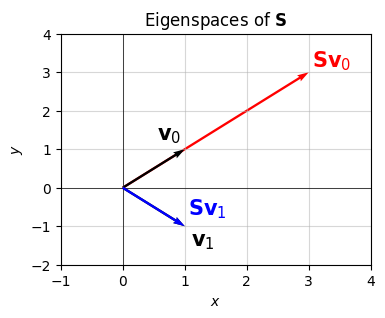

In [22]:
#| fig-align: center
S = np.array([
    [2, 1], 
    [1, 2]])
v0 = np.array([1, 1]).reshape(-1, 1)
Sv0 = S @ v0
v1 = np.array([1, -1]).reshape(-1, 1)
Sv1 = S @ v1
vectors = [x.flatten() for x in [v0, Sv0, v1, Sv1]]
plot_vectors(
    vectors, colors=['black', 'red', 'black', 'blue'], xlim=(-1, 4), ylim=(-2, 4), zorders=[1, 0, 2, 3], 
    labels=['$\mathbf{v}_0$', '$\mathbf{S}\mathbf{v}_0$', '$\mathbf{v}_1$', '$\mathbf{S}\mathbf{v}_1$'],
    text_offsets=[[-0.45, 0.25], [0.05, 0.15], [0.1, -0.5], [0.05, 0.3]], 
    title='Eigenspaces of $\mathbf{S}$')

A result I won't prove, called the **spectral theorem**, guarantees that the eigenvalues of a symmetric matrix will be real-valued, and that the eigenvectors will form an orthonormal basis for $\mathbb{R}^n$. This is why $\mathbf{X}$ ends up being an orthogonal matrix. The fact that the eigenvalues have to be real is why we can think of symmetric matrices as the matrix generalization of a real number.

The spectral decomposition $\mathbf{S} = \mathbf{X \Lambda X}^\top$ is just a matrix way of writing the individual equations $\mathbf{S}\mathbf{x} = \lambda \mathbf{x}$. Grouping the eigenvectors and eigenvalues into matrices, we can write these equations in one go as $\mathbf{S}\mathbf{X} = \mathbf{\Lambda} \mathbf{X}$, which is just the spectral decomposition.

Back to our working example, putting the eigenvalues and eigenvectors into their respective matrices gives

$$
\mathbf{\Lambda} = 
\begin{pmatrix}
3 & 0 \\
0 & 1 \\
\end{pmatrix}, \qquad
\mathbf{X} = 
\frac{1}{\sqrt{2}}
\begin{pmatrix}
1 & 1 \\
1 & -1 \\
\end{pmatrix}.
$$

That is, the symmetric matrix $\mathbf{S}$ factorizes into the spectral decomposition

$$
\mathbf{S} = \mathbf{X \Lambda X}^\top = 
\frac{1}{\sqrt{2}}
\begin{pmatrix}
1 & 1 \\
1 & -1 \\
\end{pmatrix}
\begin{pmatrix}
3 & 0 \\
0 & 1 \\
\end{pmatrix}
\frac{1}{\sqrt{2}}
\begin{pmatrix}
1 & 1 \\
1 & -1 \\
\end{pmatrix}.
$$

We can find the spectral decomposition of a symmetric matrix in numpy using `np.linalg.eigh(S)`. Note that `np.linalg.eig(S)` will also work, but `eigh` is more efficient for symmetric matrices than `eig`. In either case, they return a pair of arrays, the first being the *diagonals* of $\mathbf{\Lambda}$, the second being $\mathbf{X}$. I'll also verify that the spectral decomposition indeed gives $\mathbf{S}$.

In [23]:
S = np.array([[2, 1], 
              [1, 2]])
lambdas, X = np.linalg.eigh(S)
Lambda = np.diag(lambdas)
print(f'Lambda = \n{Lambda}')
print(f'X = \n{X}')
print(f'X Lambda X^T = \n{X @ Lambda @ X.T}')

Lambda = 
[[1. 0.]
 [0. 3.]]
X = 
[[-0.70710678  0.70710678]
 [ 0.70710678  0.70710678]]
X Lambda X^T = 
[[2. 1.]
 [1. 2.]]


Notice something from the example I just worked. It turns out that $\text{tr}(\mathbf{S}) = 4 = \lambda_0 + \lambda_1$ and $\text{det}(\mathbf{S}) = 3 = \lambda_0 \lambda_1$. This fact turns out to always be true for $n \times n$ symmetric matrices, namely if $\mathbf{S}$ has eigenvalues $\lambda_0, \lambda_1, \cdots, \lambda_{n-1}$, then

\begin{align*}
\text{tr}(\mathbf{S}) &= \sum_{i=0}^{n-1} \lambda_i = \lambda_0 + \lambda_1 + \cdots + \lambda_{n-1}, \\
\text{det}(\mathbf{S}) &= \prod_{i=0}^{n-1} \lambda_i = \lambda_0 \cdot \lambda_1 \cdots \lambda_{n-1}.
\end{align*}

This fact implies that $\mathbf{S}$ will be invertible if and only if all the eigenvalues are non-zero, since otherwise we'd have $\text{det}(\mathbf{S})=0$.

Given how important the spectral decomposition is to many applications, there are a lot of different algorithms for finding it, each with its own trade-offs. One popular algorithm for doing so is the *QR algorithm*. Roughly speaking, the QR algorithm works as follows:

- Start with $\mathbf{S}_0 = \mathbf{S}$.
- For some number of iterations $t=0,1,\cdots, T-1$ do the following:
    - Calculate the QR factorization of $\mathbf{S}_t$: $\mathbf{Q}_{t+1}, \mathbf{R}_{t+1} = \text{qr}(\mathbf{S}_t)$.
    - Update $\mathbf{S}_t$ by reversing the factorization order: $\mathbf{S}_{t+1} = \mathbf{R}_{t+1} \mathbf{Q}_{t+1}$.
- Take $\mathbf{\Lambda} \approx \mathbf{S}_{T-1}$ and $\mathbf{X} \approx \mathbf{Q}_{T-1}$.

Due to the QR factorizations and matrix multiplications, this algorithm will be $O(n^3)$ at each step, which all together gives a time complexity of $O(Tn^3)$. It's not at all obvious from what I've said why the QR algorithm even works. In fact, to work well it requires a few small [modifications](https://en.wikipedia.org/wiki/QR_algorithm) I won't go into.

### Positive Definiteness

The eigenvalues of a symmetric matrix $\mathbf{S}$ are important because they in some sense specify how much $\mathbf{S}$ tends to stretch vectors in different directions. Most important for machine learning purposes though is the *sign* of the eigenvalues. The sign of the eigenvalues of a symmetric matrix essentially determine how hard it is to optimize a given function. This is especially relevant in machine learning, since training a model is all about optimizing the loss function of a model's predictions against the data.

If $\mathbf{S}$ is $n \times n$, it will have $n$ eigenvalues $\lambda_0, \lambda_1, \cdots, \lambda_{n-1}$. Ignoring the fact that each eigenvalue can be zero, each one will be either positive or negative. That means the *sequence* of eigenvalues can have $2^n$ possible arrangements of signs. For example, when $n=3$, we could have any of the $2^3=8$ possible sign arrangements for the eigenvalues $(\lambda_0, \lambda_1, \lambda_2)$,

$$(+, +, +), \ (+, +, -), \ (+, -, +), \ (-, +, +), \ (+, -, -), \ (-, +, -), \ (-, -, +), \ (-, -, -).$$

Most of these arrangements will have mixed signs, but there will always be exactly two arrangements that don't, namely when the eigenvalues are all positive, and when the eigenvalues are all negative. Most useful in applications like machine learning are when the eigenvalues are positive, or non-negative.

A symmetric matrix whose eigenvalues are all positive is called **positive definite**. A positive definite matrix is essentially the matrix equivalent of a positive real number. When $\mathbf{S}$ is positive definite, we sometimes write $\mathbf{S} \succ 0$ to make the analogy clear. Similarly, if the eigenvalues are all non-negative, the matrix is called **positive semi-definite**, sometimes written $\mathbf{S} \succcurlyeq 0$. A positive semi-definite matrix is the matrix generalization of a non-negative number. Clearly any positive definite matrix is also positive semi-definite.

By writing $\mathbf{S}=\mathbf{X \Lambda X}^\top$ and expanding everything out term-by-term, it's not hard to show that,

- if $\mathbf{S}$ is positive definite, then $\mathbf{x}^\top \mathbf{S} \mathbf{x} > 0$ for any non-zero vector $\mathbf{x} \in \mathbb{R}^n$, 
- if $\mathbf{S}$ is positive semi-definite, then $\mathbf{x}^\top \mathbf{S} \mathbf{x} \geq 0$ for any non-zero vector $\mathbf{x} \in \mathbb{R}^n$.

Expressions of the form $\mathbf{x}^\top \mathbf{S} \mathbf{x}$ are called **quadratic forms**. They'll always be scalars since all they are is a dot product $\mathbf{x} \cdot \mathbf{S} \mathbf{x}$. This is why a positive definite matrix extends the idea of a positive number, since a positive number $a$ would satisfy $xax=ax^2 > 0$ for any non-zero scalar $x$. Similarly for the positive semi-definite case, a non-negative scalar would satisfy $xax \geq 0$.

Note that two of the most important matrices in machine learning, the Hessian and the covariance matrix, are both positive semi-definite, so these things do come up in applications. As you'd probably guess, the easiest way to determine if a symmetric matrix is positive definite or semi-definite is to just calculate the eigenvalues and check their signs. For example, I showed before that the matrix

$$
\mathbf{S} = 
\begin{pmatrix}
2 & 1 \\
1 & 2 \\
\end{pmatrix}
$$

has eigenvalues $\lambda = 3, 1$. Since both of these are positive, $\mathbf{S}$ is positive definite. It's also positive semi-definite since they're both non-negative. To check if a matrix is positive definite, for example, in numpy, you can do something like the following. Modify the inequality accordingly for the other types.

In [24]:
def is_positive_definite(S):
    eigvals = np.linalg.eigvals(S)
    return np.all(eigvals > 0)

S = np.array([[2, 1], 
              [1, 2]])
is_positive_definite(S)

True

Suppose $a \neq 0$ is some non-negative number. We know we can take its square root to get another non-negative number $\sqrt{a} \neq 0$. Positive semi-definite matrices have a similar property. If $\mathbf{S} \succcurlyeq 0$, then we can find a "square root" matrix $\mathbf{R}$ such that

$$\mathbf{S} = \mathbf{R} \mathbf{R}^\top.$$

It turns out though that matrices have many possible square roots, not just one. For this reason, we might as well choose an $\mathbf{R}$ that has some convenient form. One useful form is to assume that $\mathbf{R}$ is triangular. When we do this, we get what's called the **Cholesky Factorization**. If $\mathbf{S}$ is positive semi-definite, we'll factor $\mathbf{S}$ into as,

$$\mathbf{S} = \mathbf{L} \mathbf{L}^\top,$$

where $\mathbf{L}$ is some lower triangular matrix, which also means $\mathbf{L}^\top$ is upper triangular. 

Here's an example. Let's try to find the Cholesky factorization of the same symmetric matrix from before,

$$
\mathbf{S} = 
\begin{pmatrix}
2 & 1 \\
1 & 2 \\
\end{pmatrix}.
$$

Take $\mathbf{L}$ to be

$$
\mathbf{L} = 
\begin{pmatrix}
\sqrt{2} & 0 \\
\frac{1}{\sqrt{2}} & \sqrt{\frac{3}{2}} \\
\end{pmatrix} \approx
\begin{pmatrix}
1.414 & 0 \\
0.707 & 1.225 \\
\end{pmatrix}.
$$

Then

$$
\mathbf{L}\mathbf{L}^\top = 
\begin{pmatrix}
\sqrt{2} & 0 \\
\frac{1}{\sqrt{2}} & \sqrt{\frac{3}{2}} \\
\end{pmatrix}
\begin{pmatrix}
\sqrt{2} & \frac{1}{\sqrt{2}} \\
0 & \sqrt{\frac{3}{2}} \\
\end{pmatrix} = 
\begin{pmatrix}
2 & 1 \\
1 & 2 \\
\end{pmatrix} = 
\mathbf{S},
$$

hence $\mathbf{L}$ is the Cholesky factor or square root of $\mathbf{S}$. How I came up with $\mathbf{L}$ here isn't important. We can do the Cholesky factorization in numpy using `np.linalg.cholesky`. Let's check my answer above is correct. Looks like it is.

In [25]:
S = np.array([[2, 1], 
              [1, 2]])
L = np.linalg.cholesky(S)
print(f'L = \n{L}')
print(f'L L^T = \n{L @ L.T}')

L = 
[[1.41421356 0.        ]
 [0.70710678 1.22474487]]
L L^T = 
[[2. 1.]
 [1. 2.]]


In practice, the Cholesky factorization is calculated using variants on the same algorithms used to calculate the LU factorization. Indeed, the Cholesky and LU factorizations have a lot in common. Both methods factor a matrix into a product of lower and upper triangular matrices. The major difference is that Cholesky only needs to find one lower triangular matrix $\mathbf{L}$, not two. Like LU factorization, Cholesky runs in $O(n^3)$ time, but only uses half the FLOPS that LU does. 

This means positive semi-definite matrices have more efficient algorithms than general matrices do. For example, suppose you wanted to solve a linear system $\mathbf{A}\mathbf{x}=\mathbf{b}$. If you knew $\mathbf{A}$ was positive semi-definite, you could solve the system at half the cost by calculating the Cholesky factorization $\mathbf{A}=\mathbf{L}\mathbf{L}^\top$, and then using substitution to solve for $\mathbf{x}$. Similar approaches apply for other matrix quantities, like the inverse or determinant. 

### Singular Value Decomposition

The spectral decomposition is mostly useful for square symmetric matrices. Yet, the properties of eigenvalues and eigenvectors seem to be incredibly useful for understanding how a matrix behaves. They say something useful about the characteristic scales and directions of a matrix and its underlying linear operator. It turns out we *can* generalize the spectral decomposition to arbitrary matrices, but with some slight modifications. This modified factorization is called the **singular value decomposition**, or **SVD** for short.

Suppose $\mathbf{A}$ is some arbitrary $m \times n$ matrix. It turns out we can *always* factor $\mathbf{A}$ into a product of the form

$$\mathbf{A} = \mathbf{U} \mathbf{\Sigma} \mathbf{V}^\top,$$

where $\mathbf{U}$ is an $m \times m$ orthogonal matrix called the **left singular matrix**, $\mathbf{V}$ is a different $n \times n$ orthogonal matrix called the **left singular matrix**, and $\mathbf{\Sigma}$ is an $m \times n$ diagonal matrix called the **singular value matrix**.

The singular value matrix $\mathbf{\Sigma}$ is a rectangular diagonal matrix. This means the diagonal will only have $k=\min(m, n)$ entries. The diagonal entries are called the **singular values** of $\mathbf{A}$, usually denoted $\sigma_0, \sigma_1, \cdots, \sigma_{k-1}$. Unlike eigenvalues, singular values are required to be non-negative. 

The column vectors of $\mathbf{U}$ and $\mathbf{V}$ are called the left and right **singular vectors** respectively. Since both matrices are orthogonal, their singular vectors will form an orthonormal basis for $\mathbb{R}^m$ and $\mathbb{R}^n$ respectively.

Notice that whereas with the spectral composition $\mathbf{S} = \mathbf{X} \mathbf{\Lambda} \mathbf{X}^\top$ has only a single orthogonal matrix $\mathbf{X}$, the SVD has two different orthogonal matrices $\mathbf{U}$ and $\mathbf{V}$ to worry about, and each one is a different size. Also, while $\mathbf{\Lambda}$ can contain eigenvalues of any sign, $\mathbf{\Sigma}$ can only contain singular values that are nonnegative. 

Nonetheless, the two factorizations are related by the following fact: The *singular values* of $\mathbf{A}$ are the *eigenvalues* of the symmetric matrix $\mathbf{S} = \mathbf{A}^\top \mathbf{A}$. Not only that, they're also the eigenvalues of the transposed symmetric matrix $\mathbf{S}^\top = \mathbf{A} \mathbf{A}^\top$. This fact gives one way you could actually calculate the SVD. The singular value matrix $\mathbf{\Sigma}$ will just be the eigenvalue matrix of $\mathbf{S}$ (and $\mathbf{S}^\top$). The left singular matrix $\mathbf{U}$ will be the eigenvector matrix of $\mathbf{S}$. The right singular matrix $\mathbf{V}$ will be the eigenvector matrix of $\mathbf{S}^\top$. Very roughly speaking, this is what many SVD algorithms use, e.g. by applying the QR algorithm on both $\mathbf{S}$ and $\mathbf{S}^\top$.

Calculating the SVD by hand is much more of a pain than the spectral decomposition is because you have to do it twice, once on $\mathbf{S}$ and once on $\mathbf{S}^\top$. I'll spare you the agony of this calculation, and just use numpy to calculate the SVD of the following matrix,

$$
\mathbf{A} = 
\begin{pmatrix}
1 & 1 \\
1 & 0 \\
1 & -1 \\
\end{pmatrix}.
$$

We can use `np.linalg.svd(A)` to calculate the SVD of $\mathbf{A}$. It'll return a triplet of arrays, in order $\mathbf{U}$, the diagonal of $\mathbf{\Sigma}$, and $\mathbf{V}^T$. Note to get the full $\mathbf{\Sigma}$ you can't just use `np.diag` since $\mathbf{\Sigma}$ won't be square here. You have to add a row of zeros after to make the calculation work out. I'll do this just using a loop and filling in the diagonals manually. 

Notice that the two singular values are positive, $\sigma_0 = \sqrt{3} \approx 1.732$ and $\sigma_1 = \sqrt{2}  \approx 1.414$. In this example, the right singular matrix $\mathbf{V}$ is just $\text{diag}(-1, 1)$, which is clearly orthogonal. The left singular matrix $\mathbf{U}$ is a little harder to see, but it's also orthogonal. Finally, the product $\mathbf{U}\mathbf{\Sigma}\mathbf{V}^\top$ indeed gives $\mathbf{A}$.

In [26]:
A = np.array([
    [1, 1],
    [1, 0],
    [1, -1]])
m, n = A.shape
k = min(m, n)
U, sigma, Vt = np.linalg.svd(A)
Sigma = np.zeros((m, n))
for i in range(k):
    Sigma[i, i] = sigma[i]
USVt = U @ Sigma @ Vt
print(f'U = \n{U.round(10)}')
print(f'Sigma = \n{Sigma.round(10)}')
print(f'V = \n{Vt.T.round(10)}')
print(f'U Sigma V^T = \n{USVt.round(10)}')

U = 
[[-0.57735027  0.70710678  0.40824829]
 [-0.57735027  0.         -0.81649658]
 [-0.57735027 -0.70710678  0.40824829]]
Sigma = 
[[1.73205081 0.        ]
 [0.         1.41421356]
 [0.         0.        ]]
V = 
[[-1.  0.]
 [-0.  1.]]
U Sigma V^T = 
[[ 1.  1.]
 [ 1.  0.]
 [ 1. -1.]]


To give you an intuition is to what the SVD is doing, suppose $\mathbf{x} \in \mathbb{R}^n$ is some size-$n$ vector. Suppose we want to operate on $\mathbf{x}$ with $\mathbf{A}$ to get a new vector $\mathbf{v} = \mathbf{A}\mathbf{x}$. Writing $\mathbf{A} = \mathbf{U} \mathbf{\Sigma} \mathbf{V}^\top$, we can do this operation in a sequence of three successive steps:

1. Calculate $\mathbf{y} = \mathbf{V}^\top \mathbf{x}$: The output is also a size-$n$ vector $\mathbf{y} \in \mathbb{R}^n$. Since $\mathbf{V}$ is orthogonal, this action can only rotate (or reflect) $\mathbf{x}$ by some angle in space.
2. Calculate $\mathbf{z} = \mathbf{\Sigma}\mathbf{y}$: The output is now a size-$k$ vector $\mathbf{z} \in \mathbb{R}^k$. Since $\mathbf{\Sigma}$ is diagonal, it can only stretch $\mathbf{y}$ along the singular directions of $\mathbf{V}$, not rotate it.
3. Calculate $\mathbf{v} = \mathbf{U}\mathbf{z}$: The output is now a size-$m$ vector $\mathbf{v} \in \mathbb{R}^m$. Since $\mathbf{U}$ is orthogonal, this action can only rotate (or reflect) $\mathbf{z}$ by some angle in space.

The final output is thus a vector $\mathbf{v} = \mathbf{A}\mathbf{x}$ that first got rotated in $\mathbb{R}^n$, then scaled in $\mathbb{R}^k$, then rotated again in $\mathbb{R}^m$. So you can visualize this better let's take a specific example. To make everything show up on one plot I'll choose a $2 \times 2$ matrix, so $m=n=k=2$, for example

$$
\mathbf{A} = 
\begin{pmatrix}
1 & 2 \\
1 & 1 \\
\end{pmatrix}.
$$

The singular values to this matrix turn out to be $\sigma_0 \approx 2.618$ and $\sigma_1 \approx 0.382$. What I'm going to do is randomly sample a bunch of unit vectors $\mathbf{x}$, then apply the successive operations above to each vector. The original vectors $\mathbf{x}$ are shown in red, the vectors $\mathbf{y} = \mathbf{V}^\top \mathbf{x}$ in blue, the vectors $\mathbf{z} = \mathbf{\Sigma}\mathbf{y}$ in green, and finally the vectors $\mathbf{v} = \mathbf{U}\mathbf{z}$ in black. Notice that the red vectors just kind of fill in the unit circle, since they're all unit vectors of length one. The blue vectors also fill in the unit circle, since $\mathbf{V}^\top$ can only rotate vectors, not stretch them. The green vectors then get stretched out into an elliptical shape due to $\mathbf{\Sigma}$. The distortion of the ellipse depends on the "distortion ratio" $\frac{\sigma_0}{\sigma_1} \approx 6.85$. This means one axis gets stretched about $6.85$ times as much as the other. Finally, since $\mathbf{U}$ can only rotate vectors, the black vectors then rotate these stretched vectors into their final position.

In [27]:
A = np.array([
    [1, 2],
    [1, 1]])
m, n = A.shape
k = min(m, n)
U, sigma, Vt = np.linalg.svd(A)
Sigma = np.diag(sigma)
print(f'Sigma = \n{Sigma.round(10)}')

Sigma = 
[[2.61803399 0.        ]
 [0.         0.38196601]]


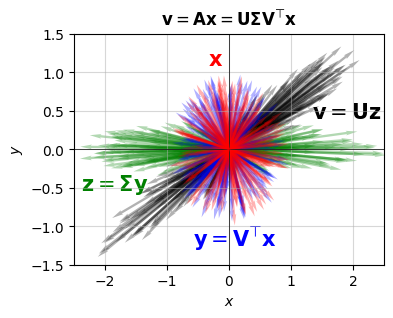

In [28]:
#| fig-align: center
plot_svd(A)

The "distortion ratio" $\frac{\sigma_0}{\sigma_1}$ mentioned above can actually be used as a measure of how invertible a matrix is. It's called the *condition number*, denoted $\kappa$. For a general $n \times n$ matrix, the **condition number** is defined as the ratio of the *largest* to the *smallest* singular value, 

$$\kappa = \frac{\sigma_0}{\sigma_{k-1}}.$$

The higher the condition number is, the harder it is to invert $\mathbf{A}$. A condition number of $\kappa=1$ is when the singular values are the same. These are easiest to invert. Matrices with low $\kappa$ are called called **well-conditioned** matrices. The identity matrix has $\kappa=1$, for example. If one of the singular values is $0$ then $\kappa$ will be infinite, meaning the matrix isn't invertible at all. Matrices with high $\kappa$ are called **ill-conditioned** matrices. For this reason, the condition number is very often used in calculations when it's important to make sure that $\mathbf{A}$ isn't singular or close to singular. In numpy, you can calculate the condition number of a matrix directly by using `np.linalg.cond(A)`.

### Low-Rank Approximations

The SVD is useful for many reasons. In fact, it's probably the single most useful factorization in all of applied linear algebra. One reason this is true is because *every matrix* has one. When in doubt, if you can't figure out how to do something with a matrix, you can take its SVD and try to work with those three matrices one-by-one. While that's nice, the more useful application of the SVD to machine learning is that it's a good way to compress or denoise data. To see why we need to look at the SVD in a slightly different way.

Suppose $\mathbf{A}$ is some $m \times n$ matrix. Suppose $\mathbf{u}_0, \mathbf{u}_1, \cdots, \mathbf{u}_{m-1}$ are the column vectors of $\mathbf{U}$, and $\mathbf{v}_0, \mathbf{v}_1, \cdots, \mathbf{v}_{n-1}$ are the column vectors of $\mathbf{V}$. Suppose $\sigma_0, \sigma_1, \cdots, \sigma_{k-1}$ are the singular values of $\mathbf{A}$, by convention ordered from largest to smallest. Then writing out the SVD in terms of the column vectors, and multiplying everything out matrix multiplication style, we have

$$
\mathbf{A} = \mathbf{U} \mathbf{\Sigma} \mathbf{V}^\top = 
\begin{pmatrix}
\mathbf{u}_0 & \mathbf{u}_1 & \cdots & \mathbf{u}_{m-1}
\end{pmatrix}
\text{diag}\big(\sigma_0, \sigma_1, \cdots, \sigma_{k-1}\big)
\begin{pmatrix}
\mathbf{v}_0^\top \\ \mathbf{v}_1^\top \\ \cdots \\ \mathbf{v}_{n-1}^\top
\end{pmatrix} = 
\sum_{i=0}^{k-1} \sigma_i \mathbf{u}_i \mathbf{v}_i^\top = 
\sigma_0 \mathbf{u}_0 \mathbf{v}_0^\top + \sigma_1 \mathbf{u}_1 \mathbf{v}_1^\top + \cdots + \sigma_{k-1} \mathbf{u}_{k-1} \mathbf{v}_{k-1}^\top.
$$

That is, we can write $\mathbf{A}$ as a sum of outer products over the singular vectors, each weighted by its singular value. That's fine. But why is it useful? All I did was re-write the SVD in a different form, after all. The gist of it is that we can use this formula to approximate $\mathbf{A}$ by a lower-dimensional matrix. Supposing we only kept the first $d < k$ terms of the right-hand side and dropped the rest, we'd have

$$\mathbf{A} \approx \mathbf{U}_d \mathbf{\Sigma}_d \mathbf{V}_d^\top = \sigma_0 \mathbf{u}_0 \mathbf{v}_0^\top + \sigma_1 \mathbf{u}_1 \mathbf{v}_1^\top + \cdots + \sigma_{d-1} \mathbf{u}_{d-1} \mathbf{v}_{d-1}^\top.$$

This approximation will be a rank-$d$ matrix again of size $m \times n$. It's rank $d$ because it's a sum of $d$ "independent" rank-1 matrices. When $d<<k$, this is called the **low-rank approximation**. While this approximation is low *rank* it still has size $m \times n$. It's the inner dimensions that got cut from $k$ to $d$, not the outer dimensions. To get a true low-dimensional approximation, we need to multiply both sides by $\mathbf{V}_d$,

$$\mathbf{A}_d =  \mathbf{A} \mathbf{V}_d = \mathbf{U}_d \mathbf{\Sigma}_d.$$

We're now approximating the $m \times n$ matrix $\mathbf{A}$ with an $m \times d$ matrix I'll call $\mathbf{A}_d$. Said differently, we're *compressing* the $n$ columns of $\mathbf{A}$ down to just $d<<n$ columns. Note that we're not *dropping* the last $n-d$ columns, we're building new columns that best approximate *all* of the old columns.

Let's try to understand why low rank approximations are useful, and that they indeed do give good approximations to large matrices. To do so, consider the following example. I'm going to load some data from a well-known dataset in machine learning called MNIST. It's a dataset of images of handwritten digits. When the low-rank approximation is applied to data, it's called **principle components analysis**, or **PCA**. PCA is probably the most fundamental dimension reduction algorithm, a way of compressing high-dimensional data into lower-dimensional data.

Each image is size $28 \times 28$, which flatten out into $n = 28 \cdot 28 = 784$ dimensions. I'll load $m=1000$ random samples from the MNIST dataset. This will create a matrix $\mathbf{A}$ of shape $1000 \times 784$. I'll go ahead and calculate the SVD to get $\mathbf{U}$, $\mathbf{\Sigma}$, and $\mathbf{V}^\top$. In this case, $k=\min(m,n)=784$, so these matrices will have sizes $1000 \times 1000$, $1000 \times 784$, and $784 \times 784$ respectively. As I mentioned before, numpy only returns the non-zero diagonals of $\mathbf{\Sigma}$, which is a size $k=784$ vector of the singular values. Thankfully, that's all we'll need here.

In [29]:
m = 1000
A = sample_mnist(size=m)
U, sigma, Vt = np.linalg.svd(A)
A.shape, U.shape, sigma.shape, Vt.shape
print(f'A.shape = {A.shape}')
print(f'U.shape = {U.shape}')
print(f'sigma.shape = {sigma.shape}')
print(f'Vt.shape = {Vt.shape}')

A.shape = (1000, 784)
U.shape = (1000, 1000)
sigma.shape = (784,)
Vt.shape = (784, 784)


Think of each *row* of $\mathbf{A}$ as representing a single image in the dataset, and each *column* of $\mathbf{A}$ as representing a single pixel of the image.

Since these are images, I might as well show you what they look like. To do that, just pick a random row from the matrix. Each row will be a flattened image. To turn it into an image, we can just reshape the row to have shape $28 \times 28$, then plot it using `plt.imshow`. Below, I'm picking off the first row, which turns out to be an image of a handwritten $0$.

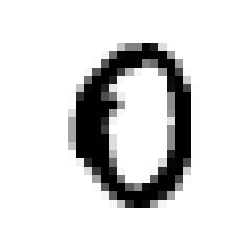

In [30]:
#| fig-align: center
img = A[0, :].reshape(28, 28)
plt.imshow(img, cmap='Greys')
plt.axis('off')
plt.show()

Let's start by taking $d=2$. Why? Because when $d=2$ we can plot each image as a point in the xy-plane! This suggests a powerful application of the low-rank approximation, to visualize high-dimensional data. To calculate $\mathbf{A}_d$, we'll need to truncate $\mathbf{U}$, $\mathbf{\Sigma}$, and $\mathbf{V}^\top$. To make the shapes come out right, we'll want to drop the first $d$ *columns* of $\mathbf{U}$ and the first $d$ *rows* of $\mathbf{V}^\top$. Once we've got these, we can calculate $\mathbf{A}_d$, which in this case will be size $1000 \times 2$.

In [31]:
d = 2
U_d, sigma_d, Vt_d = U[:, :d], sigma[:d], Vt[:d, :]
A_d = A @ Vt_d.T
print(f'U_d.shape = {U_d.shape}')
print(f'sigma_d = {sigma_d}')
print(f'Vt_d.shape = {Vt_d.shape}')
print(f'A_d.shape = {A_d.shape}')

U_d.shape = (1000, 2)
sigma_d = [197.89062659  66.60026657]
Vt_d.shape = (2, 784)
A_d.shape = (1000, 2)


Now we have $m=1000$ "images", each with $d=2$ "variables". This means we can plot them in the xy-plane, taking $x$ to be the first column `A_d[:, 0]`, and $y$ to be the second column `A_d[:, 1]`. Here's a scatter plot of all images projected down to 2 dimensions. I can't make out any patterns in the plot, and you probably can't either. But at least we've found an interesting and sometimes useful way to visualize high-dimensional data.

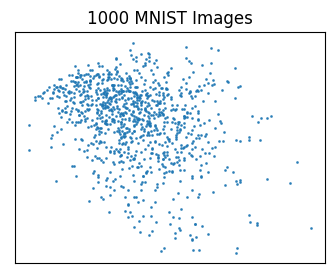

In [32]:
#| fig-align: center
plt.scatter(A_d[:, 0], A_d[:, 1], s=1, alpha=0.8)
plt.xticks([])
plt.yticks([])
plt.title(f'{m} MNIST Images')
plt.show()

How good is our approximation? We can use the singular values to figure this out. In the low rank approximation, we're keeping $d$ singular values and dropping the remaining $k-d$. Throwing away those remaining singular values is throwing away information about our original matrix $\mathbf{A}$. To figure out how much information we're keeping in our approximation, we can just look at the ratio of the sum of singular values kept to the total sum of all singular values,

$$R_d = \frac{\sigma_0 + \sigma_1 + \cdots + \sigma_{d-1}}{\sigma_0 + \sigma_1 + \cdots + \sigma_{k-1}}.$$

This ratio is sometimes called the **explained variance** for reasons I'll get into in a future lesson.

In the rank-2 case I just worked out, this ratio turns out to be $R_2 = \frac{\sigma_0 + \sigma_1}{\sum \sigma_i} \approx 0.087$. That is, this rank-2 approximation is preserving about 8.7% of the information in the original data.

In [33]:
R_d = np.sum(sigma_d) / np.sum(sigma)
print(f'R_d = {R_d}')

R_d = 0.08740669535517863


That's pretty bad. We can do better. Let's take $d=100$ and see how well that does. Of course, we won't be able to plot the data in the xy-plane anymore, but it'll better represent the original data. We're now at $R_d \approx 0.643$, which means we're preserving about 64.3% of the information in the original data, and we're doing it using only $\frac{100}{784} \approx 0.127$, or 12.7% of the total columns of $\mathbf{A}$.

In [34]:
d = 100
U_d, sigma_d, Vt_d = U[:, :d], sigma[:d], Vt[:d, :]
A_d = A @ Vt_d.T
print(f'A_d.shape = {A_d.shape}')

A_d.shape = (1000, 100)


In [35]:
R_d = np.sum(sigma_d) / np.sum(sigma)
print(f'R_d = {R_d}')

R_d = 0.6433751746962163


Another way to see how good our compression is is to "unproject" the compressed images and plot them. To unproject $\mathbf{A}_d$, just multiply on the right again by $\mathbf{V}^\top$ to get the original $m \times n$ matrix approximation again,

$$\mathbf{A} \approx \mathbf{A}_d \mathbf{V}^\top.$$

Once I've done that, I can just pluck a random row from the approximation, resize it, and plot it using `plt.imshow`, just like before. Notice this time we can still clearly see the handwritten $0$, but it's a bit grainer than it was before. The edges aren't as sharp. Nevertheless, we can still make out the digit pretty solidly.

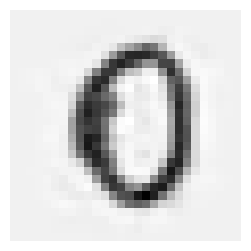

In [36]:
#| fig-align: center
img = (A_d @ Vt_d)[0, :].reshape(28, 28)
plt.imshow(img, cmap='Greys')
plt.axis('off')
plt.show()

But why is this approach good for compression anyway? After all, we still have to unproject the rows back into the original $m \times n$ space. Maybe think about it this way. If you just stored the full matrix $\mathbf{A}$, you'd have tot store $m \cdot n$ total numbers. In this example, that's $1000 \cdot 784 = 784000$ numbers you'd have to store in memory. 

But suppose now we do the low rank approximation. What we can then do is just store $\mathbf{A}_d$ and $\mathbf{V}$ instead. That means we'd instead store $m \cdot d + d \cdot n$ total numbers. In our example, that comes out to $1000 \cdot 100 + 100 \cdot 784 = 100000 + 78400 = 178400$, which is only $\frac{178400}{784000} \approx 0.227$ or 22.7% of the numbers we'd have to store otherwise. We've thus compressed our data by a factor of about $\frac{1}{0.227} \approx 4.4$. That's a 4.4x compression of the original images. 

Now, this kind of PCA compression isn't *perfect*, or **lossless**, since we can't recover the original images *exactly*. But we can still recover the most fundamental features of the image, which in this case are the handwritten digits. This kind of compression is **lossy**, since it irreversibly throws away some information in the original data. Yet, it still maintains enough information to be useful in many settings.